In [1]:
url_country_cases="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv"

In [2]:
import pandas as pd
import numpy as np
mydata = pd.read_csv(url_country_cases)

In [3]:
mydata


,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Cases_28_Days,Deaths_28_Days
0,Afghanistan,2021-10-22 11:21:22,33.939110,67.709953,155931,7252,NaN,NaN,400.559068,NaN,NaN,4.650775,4,AFG,1091,50
1,Albania,2021-10-22 11:21:22,41.153300,20.168300,180029,2855,NaN,NaN,6255.785670,NaN,NaN,1.585856,8,ALB,14165,246
2,Algeria,2021-10-22 11:21:22,28.033900,1.659600,205599,5881,NaN,NaN,468.857719,NaN,NaN,2.860422,12,DZA,3316,133
3,Andorra,2021-10-22 11:21:22,42.506300,1.521800,15382,130,NaN,NaN,19908.108458,NaN,NaN,0.845144,20,AND,226,0
4,Angola,2021-10-22 11:21:22,-11.202700,17.873900,63567,1685,NaN,NaN,193.411068,NaN,NaN,2.650746,24,AGO,9727,225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Vietnam,2021-10-22 11:21:22,14.058324,108.277199,877537,21487,NaN,NaN,901.530486,NaN,NaN,2.448558,704,VNM,149102,3470
191,West Bank and Gaza,2021-10-22 11:21:22,31.952200,35.233200,449980,4604,NaN,NaN,8820.688217,NaN,NaN,1.023157,275,PSE,57528,624
192,Yemen,2021-10-22 11:21:22,15.552727,48.516388,9635,1831,NaN,NaN,32.304065,NaN,NaN,19.003633,887,YEM,805,167
193,Zambia,2021-10-22 11:21:22,-13.133897,27.849332,209589,3658,NaN,NaN,1140.064739,NaN,NaN,1.745321,894,ZMB,874,17


In [4]:
mydata = mydata.dropna(axis="columns")

In [5]:
mydata

,Country_Region,Last_Update,Confirmed,Deaths,Mortality_Rate,UID,Cases_28_Days,Deaths_28_Days
0,Afghanistan,2021-10-22 11:21:22,155931,7252,4.650775,4,1091,50
1,Albania,2021-10-22 11:21:22,180029,2855,1.585856,8,14165,246
2,Algeria,2021-10-22 11:21:22,205599,5881,2.860422,12,3316,133
3,Andorra,2021-10-22 11:21:22,15382,130,0.845144,20,226,0
4,Angola,2021-10-22 11:21:22,63567,1685,2.650746,24,9727,225
...,...,...,...,...,...,...,...,...
190,Vietnam,2021-10-22 11:21:22,877537,21487,2.448558,704,149102,3470
191,West Bank and Gaza,2021-10-22 11:21:22,449980,4604,1.023157,275,57528,624
192,Yemen,2021-10-22 11:21:22,9635,1831,19.003633,887,805,167
193,Zambia,2021-10-22 11:21:22,209589,3658,1.745321,894,874,17


In [6]:
mydata.describe()


,Confirmed,Deaths,Mortality_Rate,UID,Cases_28_Days,Deaths_28_Days
count,1.950000e+02,195.000000,195.000000,195.000000,1.950000e+02,195.000000
mean,1.244132e+06,25291.820513,2.218333,525.051282,6.098158e+04,1025.861538
std,4.496650e+06,82860.340723,2.894432,952.514798,2.262759e+05,4160.155659
min,1.000000e+00,0.000000,0.000000,4.000000,-1.040000e+02,0.000000
25%,2.056800e+04,240.000000,0.970922,210.000000,9.665000e+02,16.500000
50%,1.620260e+05,2467.000000,1.550333,426.000000,6.972000e+03,111.000000
75%,6.602420e+05,12111.500000,2.563436,652.500000,3.461500e+04,495.000000
max,4.530200e+07,733226.000000,25.000000,9999.000000,2.625051e+06,47978.000000


In [7]:
THRESH_MINIMUM_CONF=1000
newdata=mydata

In [9]:
newdata['Confirmed'] >= THRESH_MINIMUM_CONF
newdata = newdata.loc[newdata['Country_Region'].isin(newdata.loc[newdata['Confirmed'] >= THRESH_MINIMUM_CONF, 'Country_Region'])]

In [10]:
newdata

,Country_Region,Last_Update,Confirmed,Deaths,Mortality_Rate,UID,Cases_28_Days,Deaths_28_Days
0,Afghanistan,2021-10-22 11:21:22,155931,7252,4.650775,4,1091,50
1,Albania,2021-10-22 11:21:22,180029,2855,1.585856,8,14165,246
2,Algeria,2021-10-22 11:21:22,205599,5881,2.860422,12,3316,133
3,Andorra,2021-10-22 11:21:22,15382,130,0.845144,20,226,0
4,Angola,2021-10-22 11:21:22,63567,1685,2.650746,24,9727,225
...,...,...,...,...,...,...,...,...
190,Vietnam,2021-10-22 11:21:22,877537,21487,2.448558,704,149102,3470
191,West Bank and Gaza,2021-10-22 11:21:22,449980,4604,1.023157,275,57528,624
192,Yemen,2021-10-22 11:21:22,9635,1831,19.003633,887,805,167
193,Zambia,2021-10-22 11:21:22,209589,3658,1.745321,894,874,17


<AxesSubplot:>

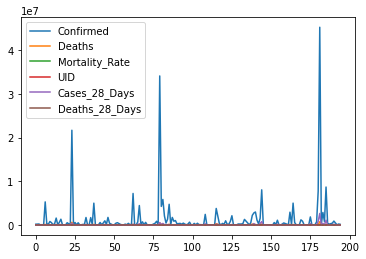

In [11]:
newdata.plot(kind="line")

In [12]:
sadc=['Malawi','South Africa','Zambia','Namibia','Mozambique','Tanzania','Swaziland','Botswana','Lesotho','Madagascar']
#pull only data for sadc countries
sadc_data=newdata[newdata['Country_Region'].isin(sadc)]

In [13]:
sadc_data

,Country_Region,Last_Update,Confirmed,Deaths,Mortality_Rate,UID,Cases_28_Days,Deaths_28_Days
22,Botswana,2021-10-22 11:21:22,184919,2396,1.295702,72,8492,36
99,Lesotho,2021-10-22 11:21:22,21566,655,3.037188,426,7171,252
106,Madagascar,2021-10-22 11:21:22,43622,960,2.200724,450,724,2
107,Malawi,2021-10-22 11:21:22,61745,2296,3.718520,454,292,27
122,Mozambique,2021-10-22 11:21:22,151174,1927,1.274690,508,804,20
123,Namibia,2021-10-22 11:21:22,128414,3544,2.759824,516,1343,56
162,South Africa,2021-10-22 11:21:22,2918366,88835,3.043998,710,26285,2180
174,Tanzania,2021-10-22 11:21:22,26034,724,2.780979,834,24667,674
193,Zambia,2021-10-22 11:21:22,209589,3658,1.745321,894,874,17


In [14]:
newdata[newdata['Country_Region']=='Malawi']

,Country_Region,Last_Update,Confirmed,Deaths,Mortality_Rate,UID,Cases_28_Days,Deaths_28_Days
107,Malawi,2021-10-22 11:21:22,61745,2296,3.71852,454,292,27
